In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# 한글 깨짐 방지
plt.rc('font', family='NanumGothic')
%matplotlib inline

# 0. 
## 배경 - 고령 운전자의 교통사고가 연일 화제이다.<br><br>![senior_drivers_news](./img/senior_drivers_news.jpg)<br> 
어떤 이들은 고령 운전자의 면허 반납을 강제해야한다고 주장하기도 하고,
<br>![senior_drivers_news](./img/offend_senior_comment.jpg)<br> 
여론이 자극적인 헤드라인으로 노인혐오를 하는 것이라고 주장하기도 한다.
<br>![senior_drivers_news](./img/defend_senior_comment.jpg)<br> 
### ▶ 언론이 말하는대로 실제 고령 운전자의 사고 발생 비율이 다른 연령에 비해 높을까?

사용 데이터셋:
- 한국도로교통공단 교통사고분석시스템 ,'https://taas.koroad.or.kr/sta/acs/exs/typical.do?menuId=WEB_KMP_OVT_UAS_ASA'
- KOSIS 운전면허소지자현황(연령대별), 'https://kosis.kr/statHtml/statHtml.do?sso=ok&returnurl=https%3A%2F%2Fkosis.kr%3A443%2FstatHtml%2FstatHtml.do%3Fconn_path%3DI3%26tblId%3DDT_13201_A002%26orgId%3D132%26'

# 0. 전처리

### 0.1.1 연령대별 운전면허 소지자 수

In [2]:
df_license = pd.read_csv('운전면허소지자현황_연령대별__20260122174710.csv')
df_license

,연령대별(1),2019,2019.1,2019.2,2019.3,2019.4,2019.5,2019.6,2019.7,2019.8,...,2024.2,2024.3,2024.4,2024.5,2024.6,2024.7,2024.8,2024.9,2024.10,2024.11
0,연령대별(1),총계,1종,1종,1종,1종,1종,1종,1종,2종,...,1종,1종,1종,1종,1종,1종,2종,2종,2종,2종
1,연령대별(1),소계,소계,대형,보통,소형,대형 견인,소형 견인,구난,소계,...,대형,보통,소형,대형 견인,소형 견인,구난,소계,보통,소형,원자
2,16세,1807,-,-,-,-,-,-,-,1807,...,0,0,0,0,0,0,1766,0,0,1766
3,17세,4078,-,-,-,-,-,-,-,4078,...,0,0,0,0,0,0,4224,0,0,4224
4,18세,62697,33393,-,33393,-,-,-,-,29304,...,0,28832,0,0,0,0,22243,19755,301,2187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,95세,542,114,24,90,-,-,-,-,428,...,38,207,0,0,0,0,812,627,1,184
82,96세,512,122,20,100,2,-,-,-,390,...,16,145,0,0,0,0,531,411,2,118
83,97세,348,70,10,60,-,-,-,-,278,...,20,106,0,0,0,0,368,288,0,80
84,98세,193,54,8,45,-,1,-,-,139,...,7,79,0,1,0,0,239,192,0,47


In [3]:
df_license.columns

Index(['연령대별(1)', '2019', '2019.1', '2019.2', '2019.3', '2019.4', '2019.5',
       '2019.6', '2019.7', '2019.8', '2019.9', '2019.10', '2019.11', '2020',
       '2020.1', '2020.2', '2020.3', '2020.4', '2020.5', '2020.6', '2020.7',
       '2020.8', '2020.9', '2020.10', '2020.11', '2021', '2021.1', '2021.2',
       '2021.3', '2021.4', '2021.5', '2021.6', '2021.7', '2021.8', '2021.9',
       '2021.10', '2021.11', '2022', '2022.1', '2022.2', '2022.3', '2022.4',
       '2022.5', '2022.6', '2022.7', '2022.8', '2022.9', '2022.10', '2022.11',
       '2023', '2023.1', '2023.2', '2023.3', '2023.4', '2023.5', '2023.6',
       '2023.7', '2023.8', '2023.9', '2023.10', '2023.11', '2024', '2024.1',
       '2024.2', '2024.3', '2024.4', '2024.5', '2024.6', '2024.7', '2024.8',
       '2024.9', '2024.10', '2024.11'],
      dtype='object')

연도 총합만 뽑아내기

In [4]:
df_license_select=df_license[['연령대별(1)','2019','2020','2021','2022','2023','2024']]
df_license_select

,연령대별(1),2019,2020,2021,2022,2023,2024
0,연령대별(1),총계,총계,총계,총계,총계,총계
1,연령대별(1),소계,소계,소계,소계,소계,소계
2,16세,1807,2197,2068,1887,1846,1766
3,17세,4078,4854,4949,4299,3950,4224
4,18세,62697,53258,64179,57189,49466,51075
...,...,...,...,...,...,...,...
81,95세,542,567,649,827,896,1057
82,96세,512,447,443,500,613,692
83,97세,348,418,355,337,388,494
84,98세,193,301,350,299,280,326


In [5]:
column=['연령대별','2019','2020','2021','2022','2023','2024']
df_license_select.columns=column

In [6]:
df_license_select

,연령대별,2019,2020,2021,2022,2023,2024
0,연령대별(1),총계,총계,총계,총계,총계,총계
1,연령대별(1),소계,소계,소계,소계,소계,소계
2,16세,1807,2197,2068,1887,1846,1766
3,17세,4078,4854,4949,4299,3950,4224
4,18세,62697,53258,64179,57189,49466,51075
...,...,...,...,...,...,...,...
81,95세,542,567,649,827,896,1057
82,96세,512,447,443,500,613,692
83,97세,348,418,355,337,388,494
84,98세,193,301,350,299,280,326


In [7]:
df_license_select = df_license_select.iloc[2:]
df_license_select

,연령대별,2019,2020,2021,2022,2023,2024
2,16세,1807,2197,2068,1887,1846,1766
3,17세,4078,4854,4949,4299,3950,4224
4,18세,62697,53258,64179,57189,49466,51075
5,19세,222602,224932,208437,208793,187952,176345
6,20세,274358,306446,296718,264166,258685,240255
...,...,...,...,...,...,...,...
81,95세,542,567,649,827,896,1057
82,96세,512,447,443,500,613,692
83,97세,348,418,355,337,388,494
84,98세,193,301,350,299,280,326


In [8]:
df_license=df_license_select
df_license

,연령대별,2019,2020,2021,2022,2023,2024
2,16세,1807,2197,2068,1887,1846,1766
3,17세,4078,4854,4949,4299,3950,4224
4,18세,62697,53258,64179,57189,49466,51075
5,19세,222602,224932,208437,208793,187952,176345
6,20세,274358,306446,296718,264166,258685,240255
...,...,...,...,...,...,...,...
81,95세,542,567,649,827,896,1057
82,96세,512,447,443,500,613,692
83,97세,348,418,355,337,388,494
84,98세,193,301,350,299,280,326


In [9]:
df_license['age']=df_license['연령대별'].str.replace('세','').str.replace('이상','').astype(int)
df_license['age']

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_1604\3934988849.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_license['age']=df_license['연령대별'].str.replace('세','').str.replace('이상','').astype(int)


2     16
3     17
4     18
5     19
6     20
      ..
81    95
82    96
83    97
84    98
85    99
Name: age, Length: 84, dtype: int64

In [10]:
df_license

,연령대별,2019,2020,2021,2022,2023,2024,age
2,16세,1807,2197,2068,1887,1846,1766,16
3,17세,4078,4854,4949,4299,3950,4224,17
4,18세,62697,53258,64179,57189,49466,51075,18
5,19세,222602,224932,208437,208793,187952,176345,19
6,20세,274358,306446,296718,264166,258685,240255,20
...,...,...,...,...,...,...,...,...
81,95세,542,567,649,827,896,1057,95
82,96세,512,447,443,500,613,692,96
83,97세,348,418,355,337,388,494,97
84,98세,193,301,350,299,280,326,98


### 0.1.2 연령대별 가해 운전자 교통사고 현황(2020~2024)

In [11]:
df_accident=pd.read_csv('교통사고통계_20260122.csv', encoding='cp949')
df_accident

,가해운전자(1당) 연령대,연도,합계,2020,2021,2022,2023,2024,Unnamed: 8
0,합계,사고[건],"1,004,265","209,654","203,130","196,836","198,296","196,349",NaN
1,합계,사망[명],"13,804","3,081","2,916","2,735","2,551","2,521",NaN
2,합계,부상[명],"1,441,886","306,194","291,608","281,803","283,799","278,482",NaN
3,19세 이하,사고[건],"25,765","5,636","5,470","5,317","4,606","4,736",NaN
4,19세 이하,사망[명],296,88,66,58,49,35,NaN
5,19세 이하,부상[명],"34,925","8,092","7,580","7,075","6,048","6,130",NaN
6,20-29세,사고[건],"124,220","28,018","27,546","24,872","22,833","20,951",NaN
7,20-29세,사망[명],"1,550",357,334,318,272,269,NaN
8,20-29세,부상[명],"185,057","42,565","40,764","36,783","33,931","31,014",NaN
9,30-39세,사고[건],"143,705","31,128","29,830","28,260","27,707","26,780",NaN


In [12]:
df_accident.columns

Index(['가해운전자(1당) 연령대', '연도', '합계', '2020', '2021', '2022', '2023', '2024',
       'Unnamed: 8'],
      dtype='object')

<br>
의미없는 column, 이름이 모호한 column 수정
<br> 

In [13]:
df_acc= df_accident.drop(columns=['Unnamed: 8'])
df_acc

,가해운전자(1당) 연령대,연도,합계,2020,2021,2022,2023,2024
0,합계,사고[건],"1,004,265","209,654","203,130","196,836","198,296","196,349"
1,합계,사망[명],"13,804","3,081","2,916","2,735","2,551","2,521"
2,합계,부상[명],"1,441,886","306,194","291,608","281,803","283,799","278,482"
3,19세 이하,사고[건],"25,765","5,636","5,470","5,317","4,606","4,736"
4,19세 이하,사망[명],296,88,66,58,49,35
5,19세 이하,부상[명],"34,925","8,092","7,580","7,075","6,048","6,130"
6,20-29세,사고[건],"124,220","28,018","27,546","24,872","22,833","20,951"
7,20-29세,사망[명],"1,550",357,334,318,272,269
8,20-29세,부상[명],"185,057","42,565","40,764","36,783","33,931","31,014"
9,30-39세,사고[건],"143,705","31,128","29,830","28,260","27,707","26,780"


In [14]:
df_acc=df_acc.iloc[3:24]
df_acc

,가해운전자(1당) 연령대,연도,합계,2020,2021,2022,2023,2024
3,19세 이하,사고[건],"25,765","5,636","5,470","5,317","4,606","4,736"
4,19세 이하,사망[명],296,88,66,58,49,35
5,19세 이하,부상[명],"34,925","8,092","7,580","7,075","6,048","6,130"
6,20-29세,사고[건],"124,220","28,018","27,546","24,872","22,833","20,951"
7,20-29세,사망[명],"1,550",357,334,318,272,269
8,20-29세,부상[명],"185,057","42,565","40,764","36,783","33,931","31,014"
9,30-39세,사고[건],"143,705","31,128","29,830","28,260","27,707","26,780"
10,30-39세,사망[명],"1,561",388,353,304,260,256
11,30-39세,부상[명],"210,441","46,384","43,441","41,135","40,589","38,892"
12,40-49세,사고[건],"170,656","37,273","35,494","33,402","32,757","31,730"


In [15]:
df_acc=df_acc.rename(columns={'연도':'사고지표'})
df_acc

,가해운전자(1당) 연령대,사고지표,합계,2020,2021,2022,2023,2024
3,19세 이하,사고[건],"25,765","5,636","5,470","5,317","4,606","4,736"
4,19세 이하,사망[명],296,88,66,58,49,35
5,19세 이하,부상[명],"34,925","8,092","7,580","7,075","6,048","6,130"
6,20-29세,사고[건],"124,220","28,018","27,546","24,872","22,833","20,951"
7,20-29세,사망[명],"1,550",357,334,318,272,269
8,20-29세,부상[명],"185,057","42,565","40,764","36,783","33,931","31,014"
9,30-39세,사고[건],"143,705","31,128","29,830","28,260","27,707","26,780"
10,30-39세,사망[명],"1,561",388,353,304,260,256
11,30-39세,부상[명],"210,441","46,384","43,441","41,135","40,589","38,892"
12,40-49세,사고[건],"170,656","37,273","35,494","33,402","32,757","31,730"


In [16]:
df_acc_total=df_acc[df_acc['사고지표']=='사고[건]']
df_acc_total

,가해운전자(1당) 연령대,사고지표,합계,2020,2021,2022,2023,2024
3,19세 이하,사고[건],"25,765","5,636","5,470","5,317","4,606","4,736"
6,20-29세,사고[건],"124,220","28,018","27,546","24,872","22,833","20,951"
9,30-39세,사고[건],"143,705","31,128","29,830","28,260","27,707","26,780"
12,40-49세,사고[건],"170,656","37,273","35,494","33,402","32,757","31,730"
15,50-59세,사고[건],"224,700","49,309","45,857","43,684","43,183","42,667"
18,60-64세,사고[건],"121,320","23,748","24,139","23,935","24,945","24,553"
21,65세 이상,사고[건],"179,548","31,072","31,841","34,652","39,614","42,369"


age group으로 묶는다

In [17]:
df_acc_ag=df_acc_total.drop(columns=['사고지표','합계'])
df_acc_ag

,가해운전자(1당) 연령대,2020,2021,2022,2023,2024
3,19세 이하,"5,636","5,470","5,317","4,606","4,736"
6,20-29세,"28,018","27,546","24,872","22,833","20,951"
9,30-39세,"31,128","29,830","28,260","27,707","26,780"
12,40-49세,"37,273","35,494","33,402","32,757","31,730"
15,50-59세,"49,309","45,857","43,684","43,183","42,667"
18,60-64세,"23,748","24,139","23,935","24,945","24,553"
21,65세 이상,"31,072","31,841","34,652","39,614","42,369"


In [18]:
df_acc_ag[['2020','2021','2022','2023','2024']]=df_acc_ag[['2020','2021','2022','2023','2024']].apply(lambda x: x.str.replace(',','')).astype(int)
df_acc_ag

,가해운전자(1당) 연령대,2020,2021,2022,2023,2024
3,19세 이하,5636,5470,5317,4606,4736
6,20-29세,28018,27546,24872,22833,20951
9,30-39세,31128,29830,28260,27707,26780
12,40-49세,37273,35494,33402,32757,31730
15,50-59세,49309,45857,43684,43183,42667
18,60-64세,23748,24139,23935,24945,24553
21,65세 이상,31072,31841,34652,39614,42369


In [19]:
df_acc_ag=df_acc_ag.reset_index(drop=True)
df_acc_ag

,가해운전자(1당) 연령대,2020,2021,2022,2023,2024
0,19세 이하,5636,5470,5317,4606,4736
1,20-29세,28018,27546,24872,22833,20951
2,30-39세,31128,29830,28260,27707,26780
3,40-49세,37273,35494,33402,32757,31730
4,50-59세,49309,45857,43684,43183,42667
5,60-64세,23748,24139,23935,24945,24553
6,65세 이상,31072,31841,34652,39614,42369


# 1. 연령대별 면허 소지자 대비 사고발생

연령대별 운전면허 소유자 수는 10,...,70,80,90대까지 세분화할 수 있지만, 가해 운전자 교통사고통계는 65세부터는 65세 이상으로 취급된다.<br>
따라서 연령대별 운전면허 소유자 수(df_license)도 이에 맞게 전처리한다.

## 1.1 전처리

In [20]:
bins=[0,19,29,39,49,59,64,100]
labels=['19세 이하','20-29세','30세-39세','40-49세','50-59세','60-64세','65세 이상']

In [21]:
df_license['age_group']=pd.cut(df_license['age'], bins=bins, labels=labels, right=True)
df_license

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_1604\109231569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_license['age_group']=pd.cut(df_license['age'], bins=bins, labels=labels, right=True)


,연령대별,2019,2020,2021,2022,2023,2024,age,age_group
2,16세,1807,2197,2068,1887,1846,1766,16,19세 이하
3,17세,4078,4854,4949,4299,3950,4224,17,19세 이하
4,18세,62697,53258,64179,57189,49466,51075,18,19세 이하
5,19세,222602,224932,208437,208793,187952,176345,19,19세 이하
6,20세,274358,306446,296718,264166,258685,240255,20,20-29세
...,...,...,...,...,...,...,...,...,...
81,95세,542,567,649,827,896,1057,95,65세 이상
82,96세,512,447,443,500,613,692,96,65세 이상
83,97세,348,418,355,337,388,494,97,65세 이상
84,98세,193,301,350,299,280,326,98,65세 이상


In [22]:
df_license[['2019','2020','2021','2022','2023','2024']]=df_license[['2019','2020','2021','2022','2023','2024']].astype(int)
df_license

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_1604\2323832075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_license[['2019','2020','2021','2022','2023','2024']]=df_license[['2019','2020','2021','2022','2023','2024']].astype(int)


,연령대별,2019,2020,2021,2022,2023,2024,age,age_group
2,16세,1807,2197,2068,1887,1846,1766,16,19세 이하
3,17세,4078,4854,4949,4299,3950,4224,17,19세 이하
4,18세,62697,53258,64179,57189,49466,51075,18,19세 이하
5,19세,222602,224932,208437,208793,187952,176345,19,19세 이하
6,20세,274358,306446,296718,264166,258685,240255,20,20-29세
...,...,...,...,...,...,...,...,...,...
81,95세,542,567,649,827,896,1057,95,65세 이상
82,96세,512,447,443,500,613,692,96,65세 이상
83,97세,348,418,355,337,388,494,97,65세 이상
84,98세,193,301,350,299,280,326,98,65세 이상


In [23]:
df_license.dtypes

연령대별           object
2019            int64
2020            int64
2021            int64
2022            int64
2023            int64
2024            int64
age             int64
age_group    category
dtype: object

In [24]:
df_lic_ag=df_license.groupby('age_group', observed=True)[['2019','2020','2021','2022','2023','2024']].sum().reset_index()
df_lic_ag

,age_group,2019,2020,2021,2022,2023,2024
0,19세 이하,291184,285241,279633,272168,243214,233410
1,20-29세,4832279,4894403,4917391,4817217,4678808,4508034
2,30세-39세,6503020,6351304,6247958,6174728,6154905,6206853
3,40-49세,7641474,7617679,7568416,7544512,7452686,7306672
4,50-59세,7273846,7378841,7503399,7599223,7752181,7835725
5,60-64세,2770616,2980465,3196470,3338554,3407460,3450209
6,65세 이상,3337165,3682632,4016538,4387358,4747426,5166386


In [25]:
df_acc_ag

,가해운전자(1당) 연령대,2020,2021,2022,2023,2024
0,19세 이하,5636,5470,5317,4606,4736
1,20-29세,28018,27546,24872,22833,20951
2,30-39세,31128,29830,28260,27707,26780
3,40-49세,37273,35494,33402,32757,31730
4,50-59세,49309,45857,43684,43183,42667
5,60-64세,23748,24139,23935,24945,24553
6,65세 이상,31072,31841,34652,39614,42369


In [26]:
df_acc_ag.dtypes

가해운전자(1당) 연령대    object
2020              int64
2021              int64
2022              int64
2023              int64
2024              int64
dtype: object

In [27]:
df_lic_ag.dtypes

age_group    category
2019            int64
2020            int64
2021            int64
2022            int64
2023            int64
2024            int64
dtype: object

## 1.2 시각화 및 가설검정

### df_divide = 연령대별 가해운전자 교통사고 현황 / 연령대별 운전면허소지자 수 (2020 ~ 2024) x 100

In [28]:
cols=['2020','2021','2022','2023','2024']

df_divide=df_acc_ag[cols]/df_lic_ag[cols]*100
df_divide


# df_acc_ag[['2020','2021','2022','2023','2024']]=df_acc_ag[['2020','2021','2022','2023','2024']].apply(lambda x: x.str.replace(',','')).astype(int)
# df_acc_ag

,2020,2021,2022,2023,2024
0,1.975873,1.956135,1.953573,1.893805,2.029048
1,0.572450,0.560175,0.516315,0.488009,0.464748
2,0.490104,0.477436,0.457672,0.450161,0.431459
3,0.489296,0.468975,0.442732,0.439533,0.434261
4,0.668249,0.611150,0.574848,0.557043,0.544519
5,0.796788,0.755177,0.716927,0.732070,0.711638
6,0.843744,0.792747,0.789815,0.834431,0.820090


2020~2024년의 데이터를 연령대별 평균을 냄

In [29]:
df_divide['average']=(df_divide['2020']+df_divide['2021']+df_divide['2022']+df_divide['2023']+df_divide['2024'])/5
df_divide

,2020,2021,2022,2023,2024,average
0,1.975873,1.956135,1.953573,1.893805,2.029048,1.961687
1,0.572450,0.560175,0.516315,0.488009,0.464748,0.520339
2,0.490104,0.477436,0.457672,0.450161,0.431459,0.461366
3,0.489296,0.468975,0.442732,0.439533,0.434261,0.454959
4,0.668249,0.611150,0.574848,0.557043,0.544519,0.591162
5,0.796788,0.755177,0.716927,0.732070,0.711638,0.742520
6,0.843744,0.792747,0.789815,0.834431,0.820090,0.816165


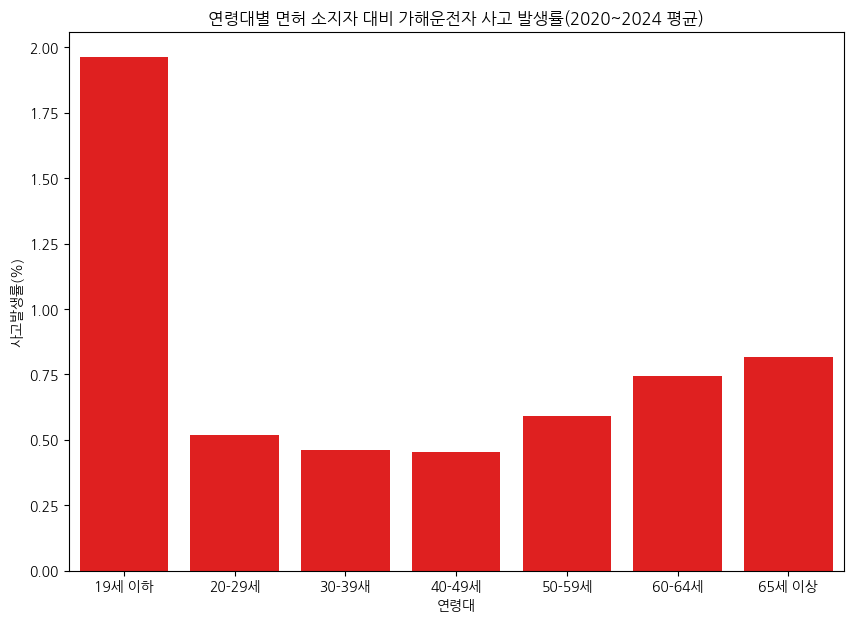

In [30]:
cols=['19세 이하','20-29세','30-39새','40-49세','50-59세','60-64세','65세 이상']
plt.figure(figsize=(10,7))
plt.title('연령대별 면허 소지자 대비 가해운전자 사고 발생률(2020~2024 평균)')

sns.barplot(data=df_divide,x=cols,y='average',color='red')
plt.xlabel('연령대')
plt.ylabel('사고발생률(%)')
plt.show()

## 1.3 결론
연령대별 면허 소지자 대비 가해운전자 사고 발생률은 19세 이하(약 1.96%)가 가장 높았으며, 그 다음으로는 65세 이상(약 0.82%) 연령대에서 상대적으로 높은 수준을 보임.

## 2. 고령 운전자의 높은 사고 발생률은 초고령화 때문일까?

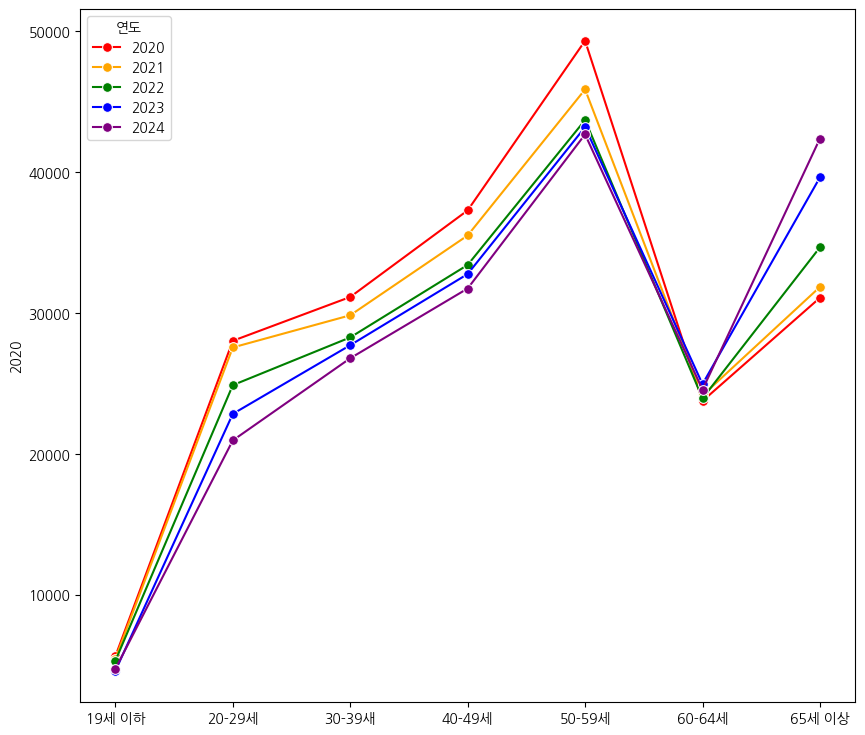

In [31]:
plt.figure(figsize=(10,9))

# sns.lineplot(data=df_acc_ag, x=cols, y='2020',color='#E1A36F',label='2020')
# sns.lineplot(data=df_acc_ag, x=cols, y='2021',color='#DEC484',label='2021')
# sns.lineplot(data=df_acc_ag, x=cols, y='2022',color='#E2D8A5',label='2022')
# sns.lineplot(data=df_acc_ag, x=cols, y='2023',color='#6F9F9C',label='2023')
# sns.lineplot(data=df_acc_ag, x=cols, y='2024',color='#577E89',label='2024')

sns.lineplot(data=df_acc_ag, x=cols, y='2020',color='red',label='2020', markers=True, marker='o', markersize=7)
sns.lineplot(data=df_acc_ag, x=cols, y='2021',color='orange',label='2021', markers=True, marker='o', markersize=7)
sns.lineplot(data=df_acc_ag, x=cols, y='2022',color='green',label='2022', markers=True, marker='o', markersize=7)
sns.lineplot(data=df_acc_ag, x=cols, y='2023',color='blue',label='2023', markers=True, marker='o', markersize=7)
sns.lineplot(data=df_acc_ag, x=cols, y='2024',color='purple',label='2024', markers=True, marker='o', markersize=7)

plt.legend(title='연도')
plt.show()

연령대별 가해운전자 교통사고 현황을 확인하다가 19세 이하, 20-29세, 30-39세, 40-49세 집단에서는 해마다 사고 발생 건이 줄고 있지만,
65세 이상 집단에서는 증가함을 확인할 수 있었다.

위의 그래프처럼 고령 운전자가 낸 사고가 늘어난 원인으로 초고령사회로 인한 노인인구 증가가 관련이 있다고 생각했다.

df_pop: 연령대별 인구 수

In [32]:
df_pop = pd.read_csv('성__연령_및_세대구성별_인구__시군구_20260124220219.csv', encoding='cp949')
df_pop

,행정구역별(시군구),성별,연령별,2020,2021,2022,2023,2024
0,행정구역별(시군구),성별,연령별,일반가구원,일반가구원,일반가구원,일반가구원,일반가구원
1,전국,계,합계,49028727,49063531,48884646,48870498,48783236
2,전국,계,15세미만,6159722,5991713,5761421,5526647,5323384
3,전국,계,15~19세,2208752,2090046,2034726,2041679,2053300
4,전국,계,20~24세,2790465,2670599,2426051,2306069,2170949
5,전국,계,25~29세,3380057,3400702,3340182,3269300,3165669
6,전국,계,30~34세,3042091,3091042,3186443,3281148,3352888
7,전국,계,35~39세,3603275,3424210,3229820,3099533,3049503
8,전국,계,40~44세,3753646,3832964,3890212,3907718,3785299
9,전국,계,45~49세,4180070,4002153,3892193,3760321,3694906


In [33]:
df_pop = df_pop.drop('성별',axis=1)
df_pop = df_pop.drop('행정구역별(시군구)',axis=1)
df_pop = df_pop[2:]
df_pop

,연령별,2020,2021,2022,2023,2024
2,15세미만,6159722,5991713,5761421,5526647,5323384
3,15~19세,2208752,2090046,2034726,2041679,2053300
4,20~24세,2790465,2670599,2426051,2306069,2170949
5,25~29세,3380057,3400702,3340182,3269300,3165669
6,30~34세,3042091,3091042,3186443,3281148,3352888
7,35~39세,3603275,3424210,3229820,3099533,3049503
8,40~44세,3753646,3832964,3890212,3907718,3785299
9,45~49세,4180070,4002153,3892193,3760321,3694906
10,50~54세,4223008,4336146,4371363,4336806,4284455
11,55~59세,4064377,3958355,3942578,4021368,4147758


19세 이하, 20-29세, 30-39세....65세 이상으로 재가공

In [34]:
def age_group_mapper(x):
    if x in ['15세미만', '15~19세']:
        return '19세 이하'
    elif x in ['20~24세', '25~29세']:
        return '20-29세'
    elif x in ['30~34세', '35~39세']:
        return '30-39세'
    elif x in ['40~44세', '45~49세']:
        return '40-49세'
    elif x in ['50~54세', '55~59세']:
        return '50-59세'
    elif x == '60~64세':
        return '60-64세'
    else:
        return '65세 이상'

In [35]:
df_pop['age_group']=df_pop['연령별'].apply(age_group_mapper)
df_pop

,연령별,2020,2021,2022,2023,2024,age_group
2,15세미만,6159722,5991713,5761421,5526647,5323384,19세 이하
3,15~19세,2208752,2090046,2034726,2041679,2053300,19세 이하
4,20~24세,2790465,2670599,2426051,2306069,2170949,20-29세
5,25~29세,3380057,3400702,3340182,3269300,3165669,20-29세
6,30~34세,3042091,3091042,3186443,3281148,3352888,30-39세
7,35~39세,3603275,3424210,3229820,3099533,3049503,30-39세
8,40~44세,3753646,3832964,3890212,3907718,3785299,40-49세
9,45~49세,4180070,4002153,3892193,3760321,3694906,40-49세
10,50~54세,4223008,4336146,4371363,4336806,4284455,50-59세
11,55~59세,4064377,3958355,3942578,4021368,4147758,50-59세


In [36]:
df_pop[['2020','2021','2022','2023','2024']] = df_pop[['2020','2021','2022','2023','2024']].astype(int)
df_pop

,연령별,2020,2021,2022,2023,2024,age_group
2,15세미만,6159722,5991713,5761421,5526647,5323384,19세 이하
3,15~19세,2208752,2090046,2034726,2041679,2053300,19세 이하
4,20~24세,2790465,2670599,2426051,2306069,2170949,20-29세
5,25~29세,3380057,3400702,3340182,3269300,3165669,20-29세
6,30~34세,3042091,3091042,3186443,3281148,3352888,30-39세
7,35~39세,3603275,3424210,3229820,3099533,3049503,30-39세
8,40~44세,3753646,3832964,3890212,3907718,3785299,40-49세
9,45~49세,4180070,4002153,3892193,3760321,3694906,40-49세
10,50~54세,4223008,4336146,4371363,4336806,4284455,50-59세
11,55~59세,4064377,3958355,3942578,4021368,4147758,50-59세


In [37]:
df_regroup=(
    df_pop.groupby('age_group')[['2020','2021','2022','2023','2024']].sum().reset_index()
)
df_regroup

,age_group,2020,2021,2022,2023,2024
0,19세 이하,8368474,8081759,7796147,7568326,7376684
1,20-29세,6170522,6071301,5766233,5575369,5336618
2,30-39세,6645366,6515252,6416263,6380681,6402391
3,40-49세,7933716,7835117,7782405,7668039,7480205
4,50-59세,8287385,8294501,8313941,8358174,8432213
5,60-64세,3764489,3988108,4067484,4130986,4088625
6,65세 이상,7858775,8277493,8742173,9188923,9666500


In [38]:
df_aygroup=df_regroup.melt(id_vars='age_group',value_vars=['2020','2021','2022','2023','2024'],var_name='year',value_name='population')
df_aygroup

,age_group,year,population
0,19세 이하,2020,8368474
1,20-29세,2020,6170522
2,30-39세,2020,6645366
3,40-49세,2020,7933716
4,50-59세,2020,8287385
5,60-64세,2020,3764489
6,65세 이상,2020,7858775
7,19세 이하,2021,8081759
8,20-29세,2021,6071301
9,30-39세,2021,6515252


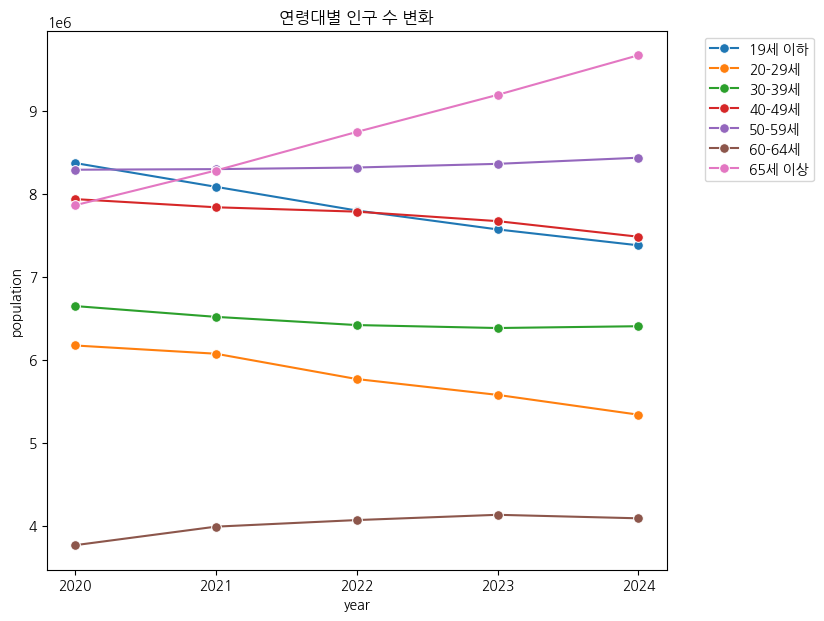

In [39]:
plt.figure(figsize=(8,7))
plt.title('연령대별 인구 수 변화')
sns.lineplot(data=df_aygroup, x='year',y='population',hue='age_group', markers=True,marker='o', markersize=7)

plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

### 1인당 사고율(연령별 사고건수 / 연령별 인구)를 구한다.

In [40]:
df_acc_ag

,가해운전자(1당) 연령대,2020,2021,2022,2023,2024
0,19세 이하,5636,5470,5317,4606,4736
1,20-29세,28018,27546,24872,22833,20951
2,30-39세,31128,29830,28260,27707,26780
3,40-49세,37273,35494,33402,32757,31730
4,50-59세,49309,45857,43684,43183,42667
5,60-64세,23748,24139,23935,24945,24553
6,65세 이상,31072,31841,34652,39614,42369


In [41]:
df_regroup

,age_group,2020,2021,2022,2023,2024
0,19세 이하,8368474,8081759,7796147,7568326,7376684
1,20-29세,6170522,6071301,5766233,5575369,5336618
2,30-39세,6645366,6515252,6416263,6380681,6402391
3,40-49세,7933716,7835117,7782405,7668039,7480205
4,50-59세,8287385,8294501,8313941,8358174,8432213
5,60-64세,3764489,3988108,4067484,4130986,4088625
6,65세 이상,7858775,8277493,8742173,9188923,9666500


In [42]:
df_acc_per = df_acc_ag[['2020','2021','2022','2023','2024']]/df_regroup[['2020','2021','2022','2023','2024']]*100
df_acc_per['age_group'] = ['19세 이하', '20-29세','30-39세','40-49세','50-59세','60-64세','65세 이상']
df_acc_per

,2020,2021,2022,2023,2024,age_group
0,0.067348,0.067683,0.068200,0.060859,0.064202,19세 이하
1,0.454062,0.453708,0.431339,0.409533,0.392589,20-29세
2,0.468417,0.457849,0.440443,0.434233,0.418281,30-39세
3,0.469805,0.453012,0.429199,0.427189,0.424186,40-49세
4,0.594989,0.552860,0.525431,0.516656,0.506000,50-59세
5,0.630843,0.605274,0.588447,0.603851,0.600520,60-64세
6,0.395380,0.384670,0.396377,0.431106,0.438308,65세 이상


### 1인당 사고율(연령별 가해운전자가 일으킨 사건 수 / 연령별 인구 수 × 100)을 계산한다.


In [43]:
df_acc_per_melt=df_acc_per.melt(id_vars='age_group',value_vars=['2020','2021','2022','2023','2024'], var_name='year',value_name='accident_rate')
df_acc_per_melt

,age_group,year,accident_rate
0,19세 이하,2020,0.067348
1,20-29세,2020,0.454062
2,30-39세,2020,0.468417
3,40-49세,2020,0.469805
4,50-59세,2020,0.594989
5,60-64세,2020,0.630843
6,65세 이상,2020,0.395380
7,19세 이하,2021,0.067683
8,20-29세,2021,0.453708
9,30-39세,2021,0.457849


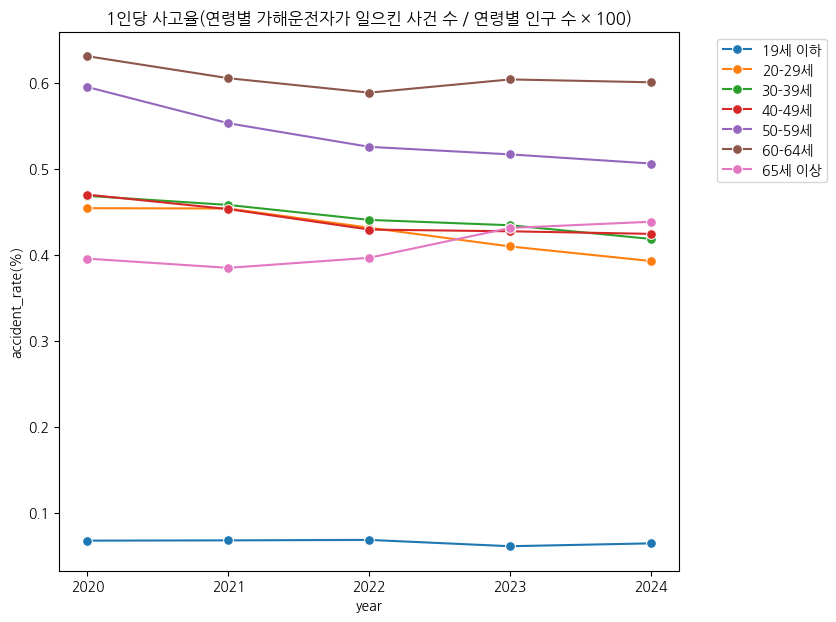

In [46]:
plt.figure(figsize=(8,7))
plt.title('1인당 사고율(연령별 가해운전자가 일으킨 사건 수 / 연령별 인구 수 × 100)')
sns.lineplot(data=df_acc_per_melt, x='year',y='accident_rate',hue='age_group', markers=True,marker='o', markersize=7)
plt.ylabel('accident_rate(%)')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()


### ▶ 초고령화로 인해 65세 이상 가해 운전자 사고 수가 증가한 것으로 가설을 세웠지만,<br> 65세 이상의 1인당 사고율도 증가하는 추세임을 보아, 사회의 고령화 때문만은 아니라는 결론이 나왔다. <br><br>원인은 정확히 알 수 없으나 사고 증가의 질적 요인이 존재함을 확인할 수 있었다.

## 한계
- 특정 1인이 다수의 교통사고를 냈을 가능성이 있지만, 통계 자료로는 알 수 없어 고려할 수 없었다.